general todo, organize class, maybe subclass, some static methods
write documentation

## Import all the relevant Modules 

In [1]:
%matplotlib inline

# adding `Modules/` to the system path
#import sys
#sys.path.insert(0, './Modules/')

#TODO: Rename module shortcuts such as hb into something usefull after development
import Modules.Hubbard_Class as hb
import Modules.Widgets as w
import ipywidgets as widgets
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.rcParams.update({'font.size':14})

from ipywidgets import HBox, VBox
import functools

def close_widgets(DIR):
    """ Close all widgets wi and displays di in notebook directory `dir()`. """
    for i in range(100):
        if f"w{i}" in DIR:
            exec(f"w{i}.close()")
        if f"d{i}" in DIR:
            exec(f"d{i}.close()")

%load_ext autoreload
%autoreload 2
#TODO rename one of the modules folders

TODO: give a good description of the model we're looking at
## Introduction

The following are all markdown todos
* TODO: Check name of basis states
* TODO: Show how basis is created
* #TODO state that total number of basis states is ncr(n,s1) ncr (n,s2)
## The Fock Basis states 

In [2]:
h1 = hb.Hubbard()

In [3]:
close_widgets(dir())
w1 = widgets.interactive(h1.show_basis, index=h1.basis_index, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

display(w1)

interactive(children=(BoundedIntText(value=6, description='State $=$', layout=Layout(width='3cm'), max=399, st…

## Hopping Hamiltonian

Markdown Taks:
* TODO: possibly show the simple n=2 analytic calculation for the hubbard molecule in occupation number basis
* TODO: Show the operator nn, na, nb etc


* TODO: Show the operator nn, na, nb etc, show S_a. S_b, S^2

* TODO: Do not show hopping, boring!

In the Widget below one can play around with the number of sites $n$, spin up and spin down states, as well as the interaction strength $U$ and the hopping amplitude $t$ to explore the hamiltonian $H$. Note that only for $n \leq 4$ the complete matrix can be fully displayed.

In [4]:
#close previous widget to prevent slowing down calculations
close_widgets(dir())

np.set_printoptions(linewidth=150) #set output length, default=75
w2 = widgets.interactive(h1.Show_H, u=h1.u, t=h1.t, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);
display(w2)

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='$U=$', max=5.0, min=-5.0, r…

# Calculate Eigenenergies 
TODO: for Hu in widget (copy paste)
TODO: for Ht with widget (copy paste) 
TODO: for Ht+Hu widget

In [5]:
# adding `Modules/` to the system path
import sys
sys.path.insert(0, '../Modules/')

from Module_Widgets_and_Sliders import Text_Box, Save_Figure_Button, Click_Save_Figure, set_filename

In [6]:
close_widgets(dir())
w3 = widgets.interactive(h1.Plot_Eigvals_Hu, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w3, name_widget=filename, output=h1.out, path=""))
 
d3 = HBox([Save_Figure_Button, filename, h1.out])
display(d3)
display(w3)

interactive(children=(FloatRangeSlider(value=(2.0, 7.0), continuous_update=False, description='$U=$', layout=L…

In [7]:
close_widgets(dir())
w4 = widgets.interactive(h1.Plot_Eigvals_Ht, t=h1.t_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w4, name_widget=filename, output=h1.out, path=""))

d4 = HBox([Save_Figure_Button, filename, h1.out])
display(d4)
display(w4)

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), continuous_update=False, description='$t=$', max=5.0,…

In [8]:
close_widgets(dir())
w5 = widgets.interactive(h1.Plot_Eigvals_H, u=h1.t_range, t=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w5, name_widget=filename, output=h1.out, path=""))

d5 = HBox([Save_Figure_Button, filename, h1.out])
display(d5)
display(w5)

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), continuous_update=False, description='$t=$', max=5.0,…

In [4]:
x = lambda u,  **kwargs: u
wwidgets.interactive(x, u=h1.t_range, t=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down)

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), continuous_update=False, description='$t=$', max=5.0,…

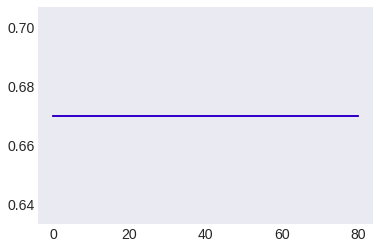

In [27]:
for i in range(h1.n.value):
	plt.plot(np.round(h1.Exp_Val_0(h1.Op_n_up(i)),2)[:], c="r")
	plt.plot(np.round(h1.Exp_Val_0(h1.Op_n_down(i)),2)[:], c="b")

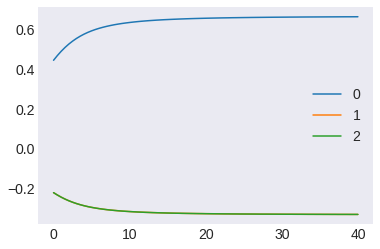

In [28]:
fig = plt.figure()
u = 100
[plt.plot(h1.u_array[:u], np.round(h1.Exp_Val_0(h1.Op_SzSz(0,i)),4)[:u], label=f"{i}") for i in range(h1.n.value)]
plt.legend();

In [69]:
h1.u_array

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. ,
       34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5, 40. ])

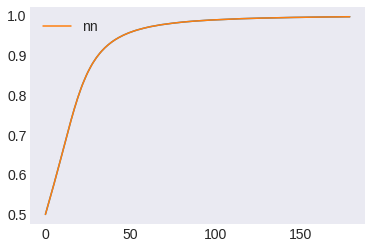

In [21]:
plt.plot(np.round(h1.Exp_Val_0(h1.Op_Sz(1)@h1.Op_Sz(1)),4))
plt.plot(np.round(1 - 2*h1.Exp_Val_0(h1.Op_nn_mean),4), label="nn")
plt.legend()

In [59]:
np.round(h1.DoubleSiteAvg,2)

array([[0.67, 0.  , 0.  ],
       [0.  , 0.67, 0.  ],
       [0.  , 0.  , 0.67]])

In [11]:
h1.Exp_Val_0(h1.Op_nn_mean).shape

(81,)

In [9]:
h1.diag(0)

array([0., 0., 0., 0., 0., 1., 0., 0., 1.])

In [8]:
h1.Op_nn

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
np.diag(h1.Op_n_up(0)* h1.Op_n_down(0))

array([0., 0., 0., 0., 0., 1., 0., 0., 1.])

In [14]:
vars()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  "get_ipython().run_line_magic('matplotlib', 'inline')\n\n# adding `Modules/` to the system path\n#import sys\n#sys.path.insert(0, './Modules/')\n\n#TODO: Rename module shortcuts such as hb into something usefull after development\nimport Modules.Hubbard_Class as hb\nimport Modules.Widgets as w\nimport ipywidgets as widgets\nimport numpy as np\n\n# Plotting\nimport matplotlib.pyplot as plt\nplt.style.use('seaborn-dark')\nplt.rcParams.update({'font.size':14})\n\nfrom ipywidgets import HBox, VBox\nimport functools\n\nget_ipython().run_line_magic('load_ext', 'autoreload')\nget_ipython().run_line_magic('autoreload', '2')\n#TODO rename one of the modules folders",
  'h1 = hb.Hubbard()',
  'h1.Op_nn',
  'x = lambda u, 